In [28]:
# Initialize Otter
import otter
grader = otter.Notebook()

## Assignment 3 (Part 2)

This part of the assignment is based on inferencing causality using Directed Acyclic Graphs. Please ensure that you have thoroughly gone through Lecture 12 and 13 and the associated materials (including CI-3-causal-graphical-models-LUMS.ipynb) before starting. 

In [29]:
from causalgraphicalmodels import CausalGraphicalModel

**Question 1:** There are 3 basic causal graph structures that show different types of association between variables. These are forks, chains and colliders. To check your understanding of these structures, in the cell below, draw 3 **different** DAGs that **ALL** show the following conditional independence:

![Q1](Images/q1.png)

<!--
BEGIN QUESTION
name: q1
points: 6
-->

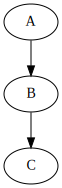

In [30]:
one1 = CausalGraphicalModel(
    nodes=["A", "B", "C"], 
    edges= [
        ("B", "A"),
        ("C", "B"),
    ]
)

one1.draw()

two1 = CausalGraphicalModel(
    nodes=["A", "B", "C"],
    edges= [
        ("B", "A"),
        ("B", "C")
    ]
)

two1.draw()

three1 = CausalGraphicalModel(
    nodes=["A", "B", "C"], 
    edges= [("A", "B"),
           ("B", "C")
           ]
)

three1.draw()

In [31]:
grader.check("q1")

All tests passed!

The next two questions test your knowledge about Simpson's Paradox. 

<!-- BEGIN QUESTION -->

**Question 2:** Look at the following table (that shows the results of Person A and Person B performing treatments and no treatments on different people) and explain in one sentence why a Simpson's Paradox is shown through the results.
![Table1](Images/table1.png)

<!--
BEGIN QUESTION
name: q2
points: 2
manual: true
-->

_If we compare person A's and person B's rate of success sepperately for treatment and non treatment then we can see that person A has a higher rate of success. But looking at the overall rate of success we can see that the results are vice versa. This is because person B has less people in treatment group and more in no treatment group while person A has more people in treatment group and less in No treatment group._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3:** The table below gives an in depth view of the data used to construct the table in Question 2. Based on the data, draw a DAG that can relate Gender, Treatment and Success. Use 'G', 'T' and 'S' in the graph nodes.  Hint: see if any of the three variables affect each other.
![Table1](Images/table2.png)

<!--
BEGIN QUESTION
name: q3
points: 3
manual: true
-->

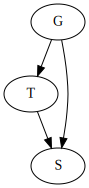

In [32]:
one3 = CausalGraphicalModel(
    nodes=["G", "T", "S"],
    edges= [
        ("G", "S"),
        ("T", "S"),
        ("G", "T")
    ]
)

one3.draw()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4:** Using Tables in Q2 and Q3, can you explain why there was a Simpson's Paradox in the Q2 Table?
<!--
BEGIN QUESTION
name: q4
points: 2
manual: true
-->

_Table in Q3 is conditioned on gender while in q2 gender is not specified. Simillarly in table of q2 has variation in the size of population between treatment and non treatment of person A and person B. Person B has less people in treatment group and more in no treatment group while person A has more people in treatment group and less in No treatment group._

<!-- END QUESTION -->



The next series of question involves using tools to infer causality using the following DAG.

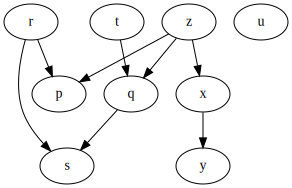

In [33]:
dag = CausalGraphicalModel(
nodes=["x", "y", "z", "p", "q", "r", "s", "t", "u"],
edges=[("z", "x"), ("z", "p"), ("z", "q"),
      ("r", "s"), ("x", "y"), ("r", "p"), ("t", "q"), ("q", "s")]
)

dag.draw()

**Question 5:** How many conditionally independent relationships are in the graph above? Your answer is an int stored in answer5.
<!--
BEGIN QUESTION
name: q5
points: 3
-->

In [34]:
answer5 = len(dag.get_all_independence_relationships())
answer5

2464

In [35]:
grader.check("q5")

All tests passed!

**Question 6:** What is the longest backdoor path in the graph from x to r, after intervention on z? Answer6 is a list.

Example: answer6= ['a', 'b', 'c']
<!--
BEGIN QUESTION
name: q6
points: 3
-->

In [36]:
intervention_dag = dag.do('z')
sets = intervention_dag.get_all_backdoor_paths('x', 'r')
print(sets)
answer6 = sets[1]
answer6

[['x', 'z', 'p', 'r'], ['x', 'z', 'q', 's', 'r']]


['x', 'z', 'q', 's', 'r']

In [37]:
grader.check("q6")

All tests passed!

**Question 7:** List all the colliders in the example dag. Answer7 is a list of lists. Please list the nodes forming a collider in ascending order in a list. Please list the lists in ascending order also (based on the first node or the second if the first one is the same).

Example:
answer7= [['a', 'b', 'c'], ['a', 'e', 'f], ['b', 'f', 'g']]
<!--
BEGIN QUESTION
name: q7
points: 5
-->

In [38]:
answer7 = [['r', 's', 'q'], ['r', 'p', 'z'], ['t', 'q', 'z']]
answer7

[['r', 's', 'q'], ['r', 'p', 'z'], ['t', 'q', 'z']]

In [39]:
grader.check("q7")

All tests passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [40]:
grader.check_all()

q1:

    All tests passed!
    

q5:

    All tests passed!
    

q6:

    All tests passed!
    

q7:

    All tests passed!